<a href="https://colab.research.google.com/github/Cairo-Henrique/Estrutura-e-dinamica-de-redes-complexas/blob/main/Networkx_Redes_Complexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

Nós

In [ ]:
G = nx.Graph()

In [ ]:
G.add_node(1)

In [ ]:
# Adiciona elementos de uma lista
G.add_nodes_from([2, 3])

In [ ]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [ ]:
# Grafo H com 10 nós conectados em sequência
H = nx.path_graph(10)

In [ ]:
# Adiciona nós de H em G
G.add_nodes_from(H)

In [ ]:
# Adiciona H como um nó em G. Grafo de grafos!
G.add_node(H)

In [ ]:
G.add_edge(1, 2, weight = 0.1)

Arestas

In [ ]:
G.add_edge(1, 2)

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])

In [ ]:
print(H.edges)
G.add_edges_from(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


In [ ]:
# Limpar o grafo
G.clear()

In [ ]:
# Grafo todo ferrado
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [ ]:
print(G.number_of_nodes())

print(G.number_of_edges())

print(G.adj)

print(G.degree)

# Adjacency Matrix
print(nx.adjacency_matrix(G).todense())

8
3
{1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}}
[(1, 2), (2, 1), (3, 2), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 1)]
[[0 1 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]]


In [ ]:
# Grafo direcionado
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

Examining elements of a graph

In [ ]:
print(list(G.nodes))

print(list(G.edges))

print(list(G.adj[1])) # nós conectados a 1 # or list(G.neighbors(1))

print(G.degree[1])  # grau de 1

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [ ]:
print(G.edges([2, 'm']))

print(G.degree([2, 3]))

[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


Removing elements from a graph

In [ ]:
G.remove_node(2)
G.remove_nodes_from("spam") # remove  s, p, a, m, mas ão spam

G.remove_edge(1, 3)

Using the graph constructors

In [ ]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [ ]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

In [ ]:
nx.convert_node_labels_to_integers(G) # para evitar bagunça caso necessário, devido à liberdade que o nx dá na escolha de nós
print(G.nodes())

[1, 3, 'spam', 2]


Accessing edges and neighbors

In [ ]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [ ]:
print(G[1][2])

print(G.edges[1, 2])

{'color': 'yellow'}
{'color': 'yellow'}


In [ ]:
# Muda atributos
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

In [ ]:
# Grafo com pesos
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [ ]:
# Acesso de arestas usando .edges
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

Graph attributes

In [ ]:
G = nx.Graph(day="Friday")
G.graph # atributos do grafo

{'day': 'Friday'}

In [ ]:
# Modifica atributo
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

Node attributes

In [ ]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1] # atributos dos nós do grafo

{'time': '5pm'}

In [ ]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Edge Attributes

In [ ]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges

EdgeView([(1, 2), (3, 4), (3, 2), (4, 5)])

Directed graphs

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [ ]:
DG.out_degree(1, weight='weight')

0.5

In [ ]:
DG.in_degree(1, weight='weight')

0.75

In [ ]:
DG.degree(1, weight='weight') # soma in + out

1.25

In [ ]:
print(list(DG.successors(1))) # para quem 1 aponta

print(list(DG.predecessors(1))) # quem aponta para 1

print(list(DG.neighbors(1))) # definido como successors

[2]
[3]
[2]


In [ ]:
H = nx.Graph(DG)  # create an undirected graph H from a directed graph DG

Multigraphs (permite mais de uma aresta entre dois nós)

In [ ]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [ ]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3) # caminho ótimo!

[1, 2, 3]

Graph generators and graph operations

In [ ]:
nx.subgraph(G, nbunch) # Returns the subgraph induced on nodes in nbunch.

nx.union(G, H[, rename]) # Combine graphs G and H.

nx.disjoint_union(G, H) # Combine graphs G and H.

nx.cartesian_product(G, H) # Returns the Cartesian product of G and H.

nx.compose(G, H) # Compose graph G with H by combining nodes and edges into a single graph.

nx.complement(G) # Returns the graph complement of G.

nx.create_empty_copy(G[, with_data]) # Returns a copy of the graph G with all of the edges removed.

nx.to_undirected(graph) # Returns an undirected view of the graph graph.

nx.to_directed(graph) # Returns a directed view of the graph graph.

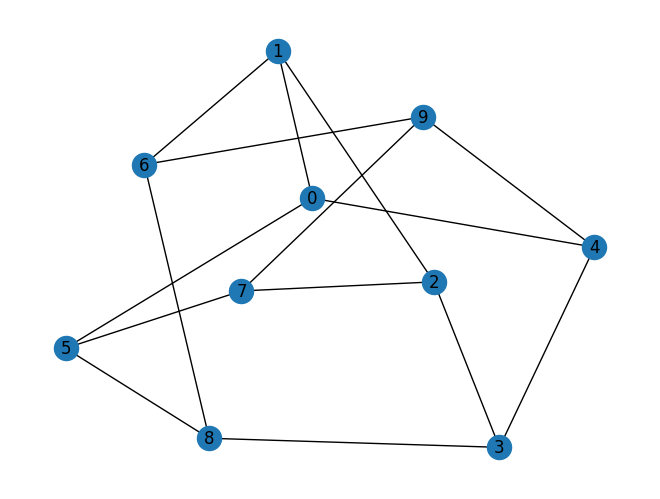

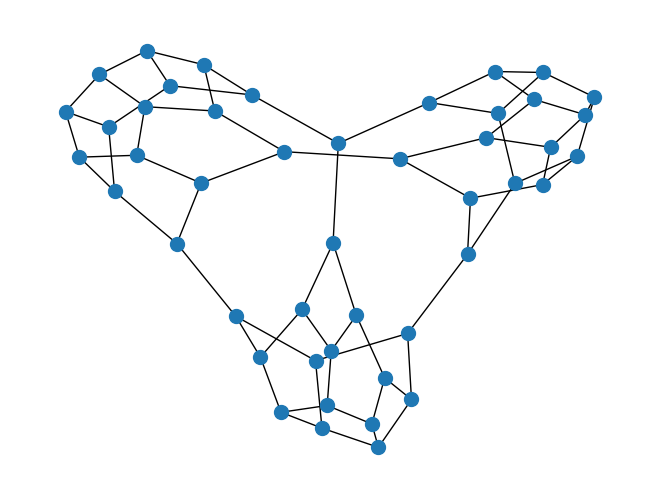

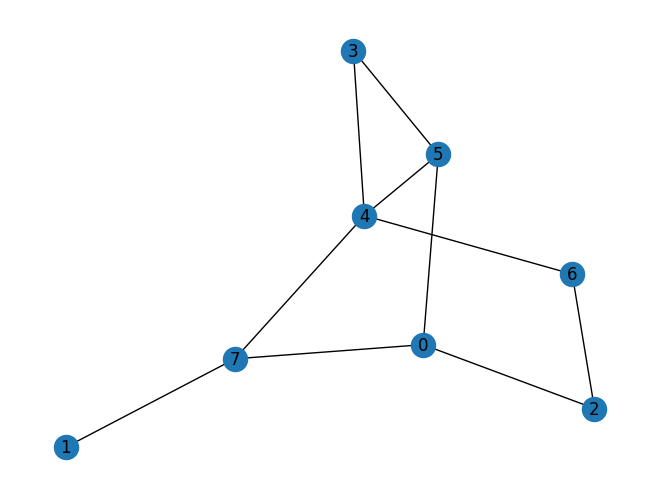

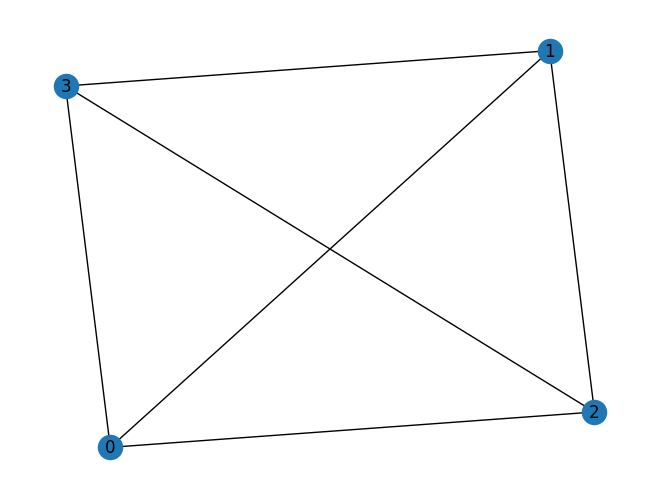

In [6]:
# Petersen graph
G1 = nx.petersen_graph()
nx.draw(G1, with_labels=True)
plt.show()

# Tutte graph
G2 = nx.tutte_graph()
nx.draw(G2, with_labels=False, node_size=100)
plt.show()

# Sedgewick maze graph
G3 = nx.sedgewick_maze_graph()
nx.draw(G3, with_labels=True)
plt.show()

# Tetrahedral graph (grafo do tetraedro)
G4 = nx.tetrahedral_graph()
nx.draw(G4, with_labels=True)
plt.show()

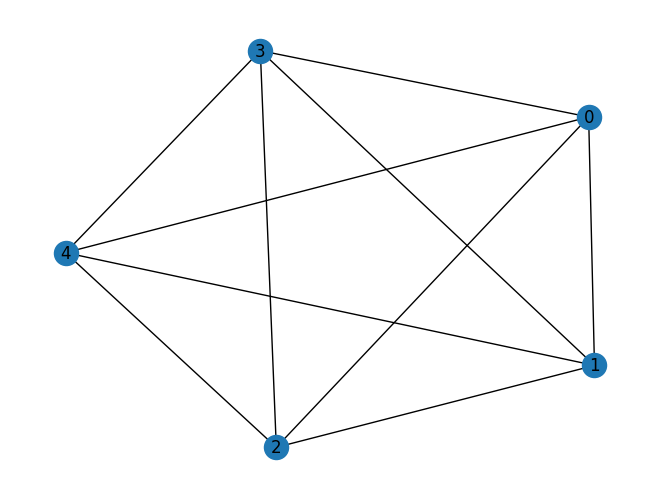

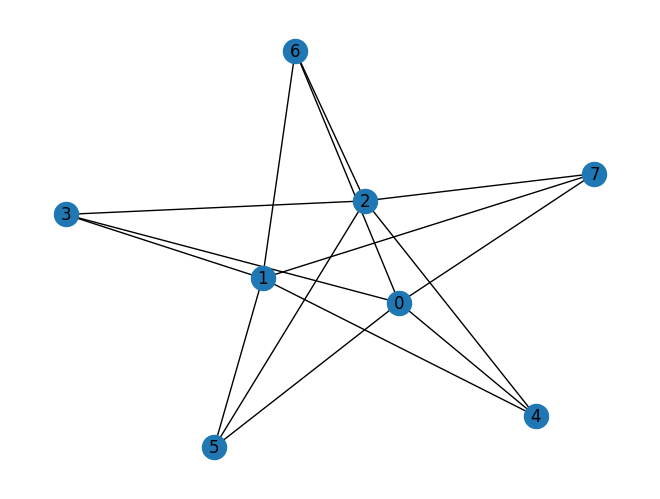

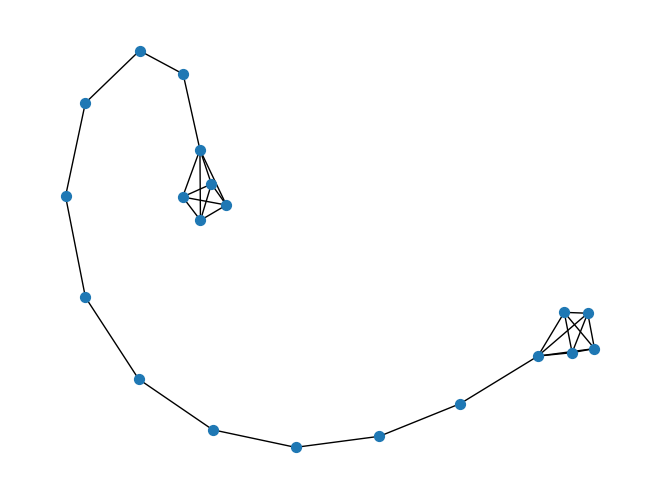

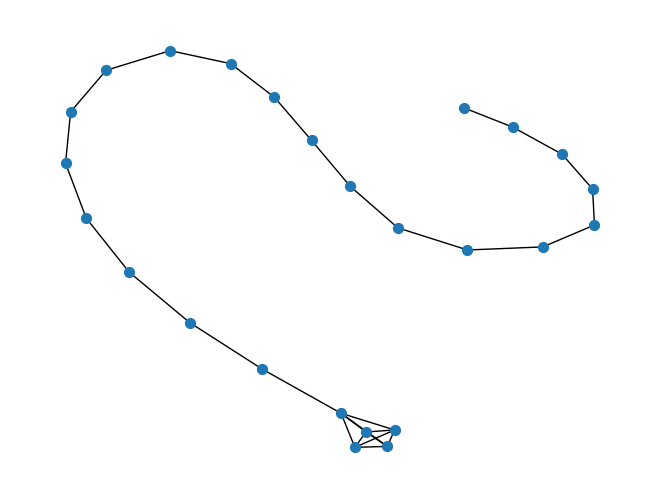

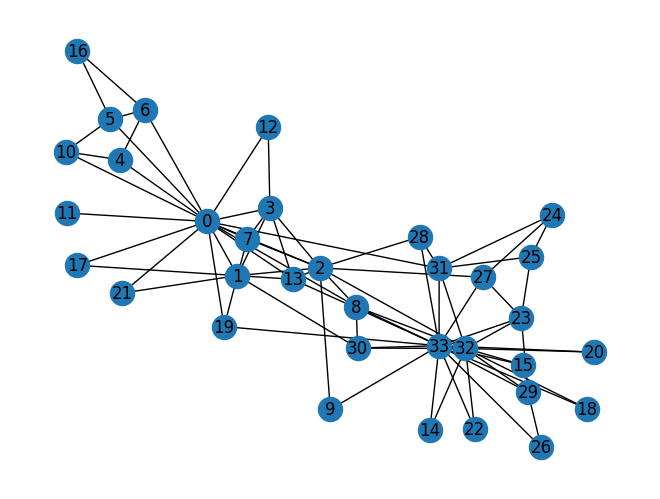

In [18]:
K_5 = nx.complete_graph(5) # K_5 é o grafo completo com 5 vértices (todos os nós interconectados)
K_3_5 = nx.complete_bipartite_graph(3, 5) # É o grafo bipartido completo K_3,5. Tem duas partes: um conjunto com 3 vértices e outro com 5. Cada vértice de um lado se conecta a todos os do outro
barbell = nx.barbell_graph(5, 10) # Constrói um grafo formado por dois grafos completos K_5 conectados por um caminho linear de 10 vértices.
lollipop = nx.lollipop_graph(5, 20) # Constrói um grafo formado por um grafo completo K_10 ligado a um caminho linear de 20 vértices.
karate_club = nx.karate_club_graph() # Grafo de Karate Club

nx.draw(K_5, with_labels=True)
plt.show()

nx.draw(K_3_5, with_labels=True)
plt.show()

nx.draw(barbell, with_labels=False, node_size=50)
plt.show()

nx.draw(lollipop, with_labels=False, node_size=50)
plt.show()

nx.draw(karate_club, with_labels=True)
plt.show()

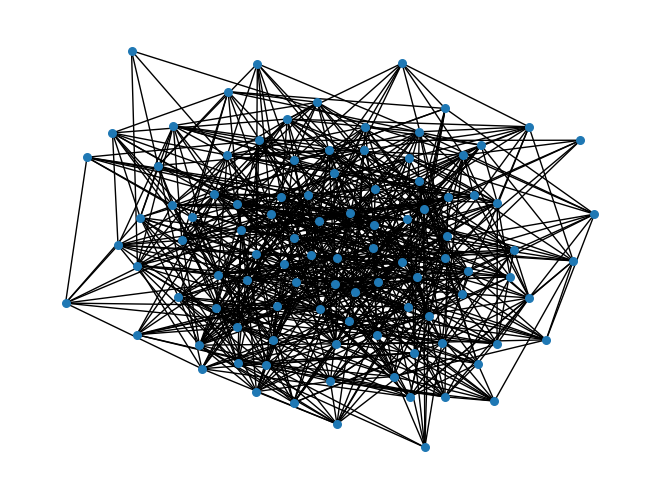

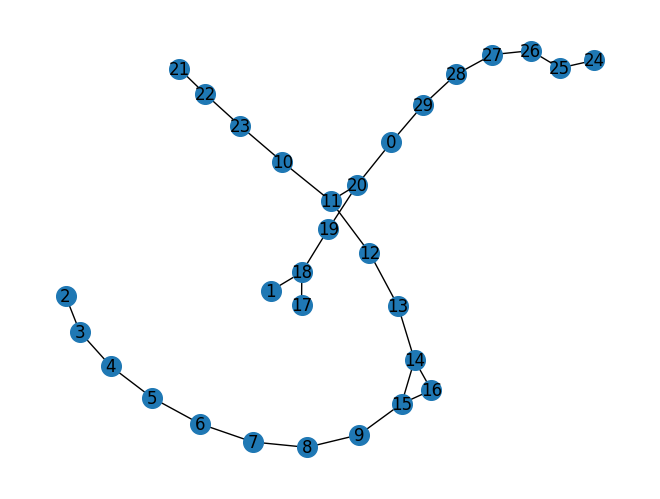

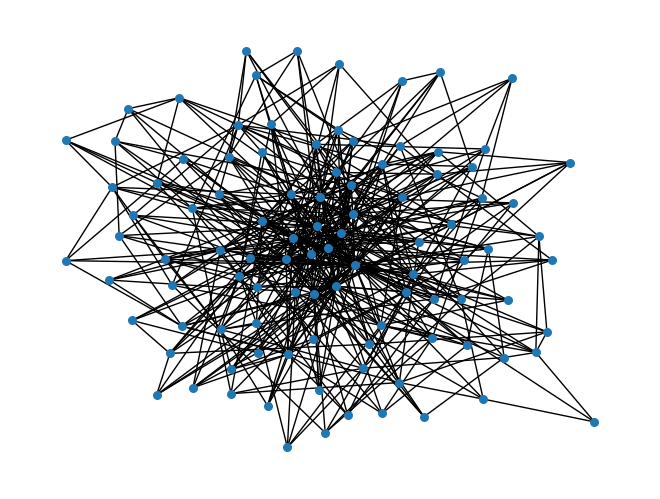

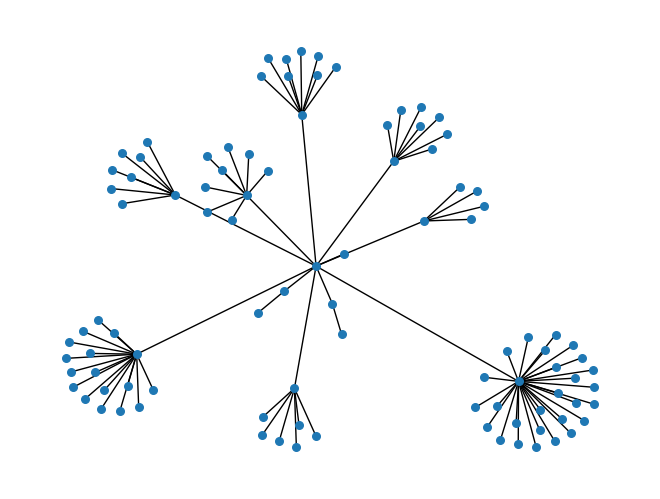

In [12]:
er = nx.erdos_renyi_graph(100, 0.15) # 100 vértices com probabilidade de conexão 0.15
ws = nx.watts_strogatz_graph(30, 3, 0.1) # Cria um grafo de 30 vértices. Cada vértice começa conectado aos 3 vizinhos mais próximos de cada lado. Novas arestas são “reconectadas” aleatoriamente com probabilidade 0.1.
ba = nx.barabasi_albert_graph(100, 5) # Cria um grafo de 100 vértices. Cada novo vértice se conecta a 5 já existentes, com probabilidade proporcional ao grau deles.
red = nx.random_lobster(5, 0.9, 0.9)

# Erdős–Rényi
nx.draw(er, node_size=30)
plt.show()

# Watts–Strogatz
nx.draw(ws, with_labels=True, node_size=200)
plt.show()

# Barabási–Albert
nx.draw(ba, node_size=30)
plt.show()

# Random Lobster
nx.draw(red, node_size=30)
plt.show()


In [ ]:
# Leitura de grafos em arquivos
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

Analyzing graphs

In [13]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [14]:
sorted(d for n, d in G.degree()) # ranqueia os graus do menor para o maior

[0, 1, 1, 2]

In [17]:
nx.clustering(ba) # dict com coeficientes de clustering de cada nó

{0: 0.15220483641536273,
 1: 0.14166666666666666,
 2: 0.3333333333333333,
 3: 0.10526315789473684,
 4: 0.17,
 5: 0.16176470588235295,
 6: 0.1349206349206349,
 7: 0.16137566137566137,
 8: 0.19852941176470587,
 9: 0.21578947368421053,
 10: 0.11,
 11: 0.13852813852813853,
 12: 0.24242424242424243,
 13: 0.2727272727272727,
 14: 0.1895424836601307,
 15: 0.09971509971509972,
 16: 0.23636363636363636,
 17: 0.14285714285714285,
 18: 0.11764705882352941,
 19: 0.17647058823529413,
 20: 0.32142857142857145,
 21: 0.22727272727272727,
 22: 0.12727272727272726,
 23: 0.5,
 24: 0.5333333333333333,
 25: 0.32142857142857145,
 26: 0.13071895424836602,
 27: 0.2857142857142857,
 28: 0.19444444444444445,
 29: 0.16666666666666666,
 30: 0.14285714285714285,
 31: 0.19230769230769232,
 32: 0.25,
 33: 0.26666666666666666,
 34: 0.35714285714285715,
 35: 0.14285714285714285,
 36: 0.32142857142857145,
 37: 0.2727272727272727,
 38: 0.18181818181818182,
 39: 0.4,
 40: 0.3333333333333333,
 41: 0.1111111111111111,
 42:

Drawing graphs

In [19]:
import matplotlib.pyplot as plt

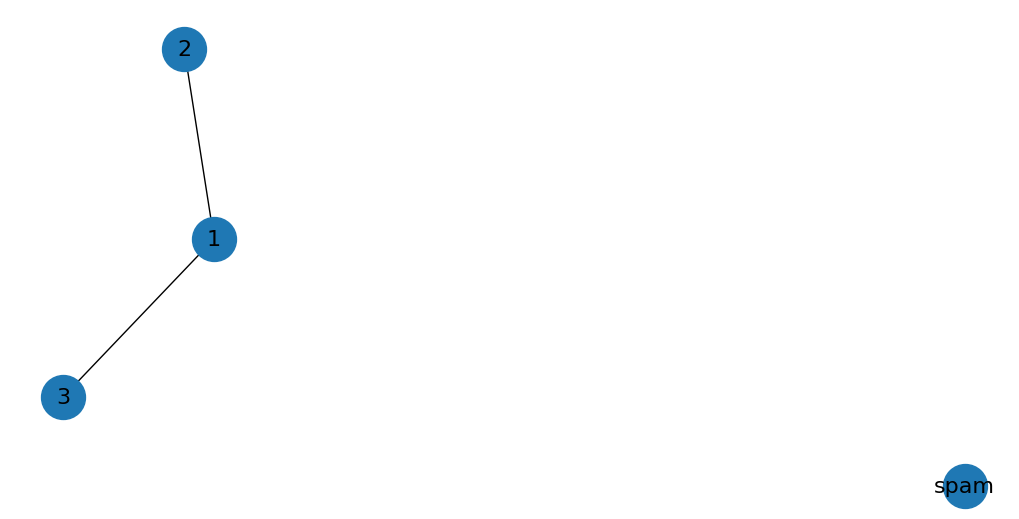

In [15]:
# Plot do grafo

grafo = G

plt.figure(figsize=(10,5))
nx.draw(grafo, with_labels=True, node_size = 1000, font_size = 16, pos = nx.spring_layout(grafo))
plt.show()

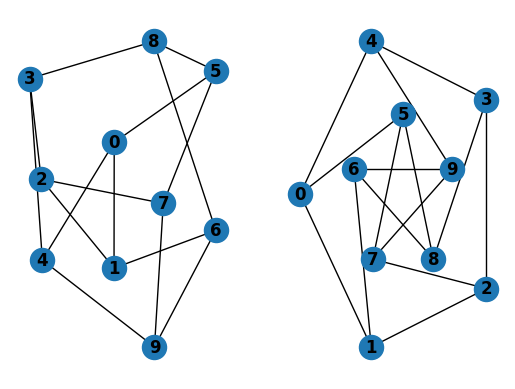

In [23]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

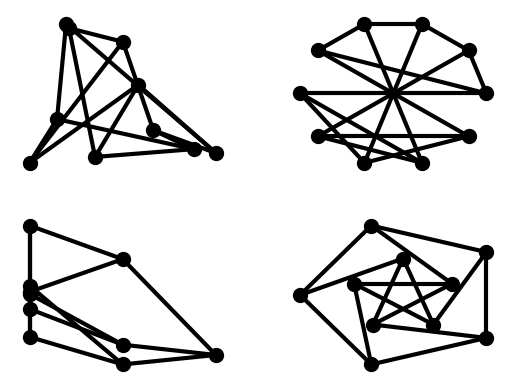

In [24]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

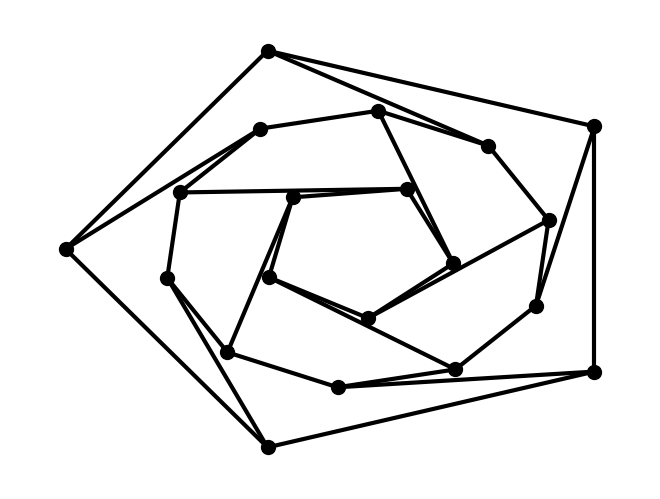

In [27]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
G = nx.dodecahedral_graph()
shells = [
    [2, 3, 4, 5, 6],                        # primeira camada
    [8, 1, 0, 19, 18, 17, 16, 15, 14, 7],  # segunda camada
    [9, 10, 11, 12, 13]                     # terceira camada
] # Isso serve para organizar nós em camadas para o plot
nx.draw_shell(G, nlist=shells, **options)